# Retificador de meia onda (Carga R/E)

<center>
<img width="350" height="500" src="Figuras/03_meia_onda_re.png">
</center>

In [2]:
from funcoes import *
%run funcoes.py
%matplotlib inline

# - Tensão na carga - # 
Vpk:	 311.1269837220809 
Vm: 	 185.78485978881548 
Vrms: 	 194.447792674691
# - Corrente na carga - # 
Ipk: 	 40.281360553339006 
Im: 	 8.946214933659585 
Irms: 	 16.908736903921497
# - Potências - # 
Ppk:	 12532.556115113233 
P: 	 2485.553776934325 
S: 	 3719.9221188627293
# - Fatores - # 
FP:	 0.6681736061974919 
THD V:	 4.187412526499231 
THD I:	 1.1140367548132453


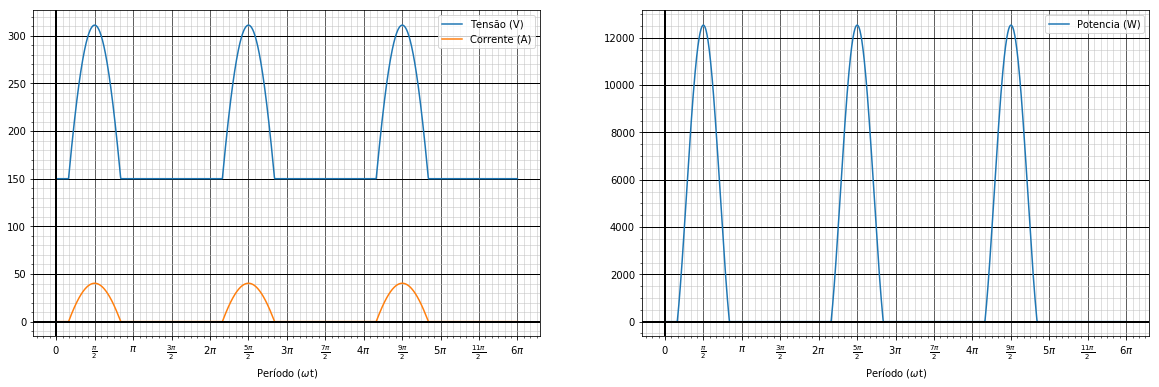

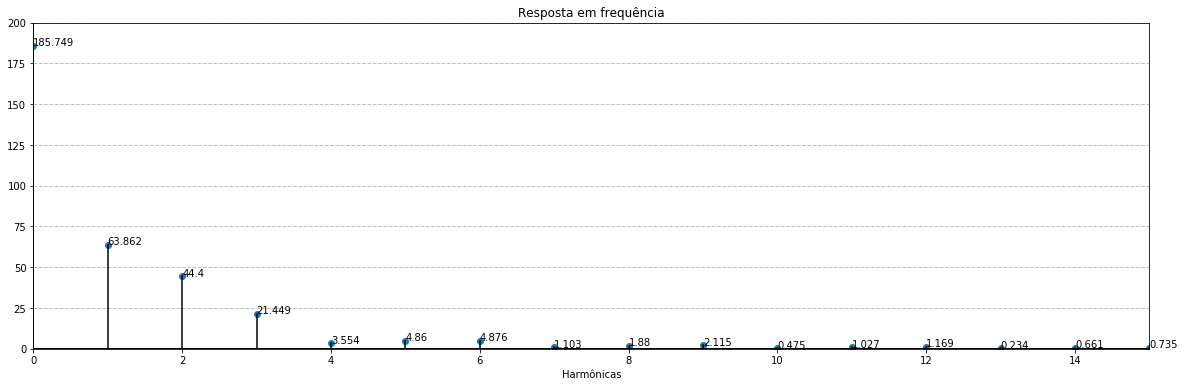

In [3]:
############# RETIFICADOR MEIA ONDA #############
################### CARGA R/E ###################

V_pk = 220*sqrt(2)
R = 4
T = 2*pi
E = 150

ab = calculo_ab(f'{V_pk}*sin(x)', E)
a = ab[0]
b = ab[1]

func_v = f'{E} + ({V_pk}*sin(x) - {E})*{degrau(a,b)}'
V_media = calculo_medio(func_v)
V_rms = calculo_rms(func_v)

func_i = f'({E} - ' + func_v + f')/{R}'
I_media = calculo_medio(func_i)
I_rms = calculo_rms(func_i)
I_pk = calculo_pk(func_i)

func_p = '(' + func_v + ')*(' + func_i + ')'
P = calculo_medio(func_p)
S = I_rms*V_pk/sqrt(2)
P_pk = calculo_pk(func_p)

FP = P/S
thdV = calculo_thd(func_v, T)
thdI = calculo_thd(func_i, T)

print("# - Tensão na carga - #"   , "\nVpk:\t"  , V_pk, "\nVm: \t"  , V_media, "\nVrms: \t", V_rms)
print("# - Corrente na carga - #" , "\nIpk: \t" , I_pk, "\nIm: \t"  , I_media, "\nIrms: \t", I_rms)
print("# - Potências - #"         , "\nPpk:\t"  , P_pk, "\nP: \t"   , P      , "\nS: \t"   , S)
print("# - Fatores - #"           , "\nFP:\t"   , FP  , "\nTHD V:\t", thdV   , "\nTHD I:\t", thdI)

plot_info(func_v, func_i, xlim=(0, T))
fig, (ax2) = plt.subplots(1, 1, figsize=(20, 6), sharey=True, sharex=True)
plot_fft(func_v, ax2, T=2*np.pi, n_harmonicas = 15)